# **Explainable AI for Stock Market Prediction**

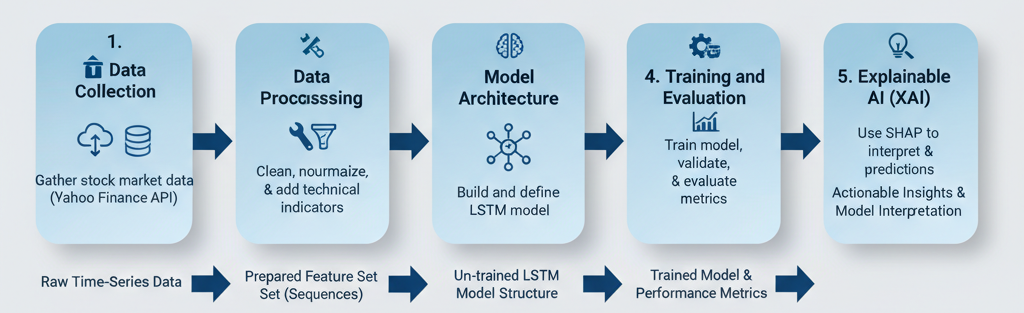

In [73]:
from IPython.display import Image

# Show your image (replace with your file path)
Image('/content/Workflow.png')


# Data Collection

In [1]:
!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mse

In [3]:
Data="https://docs.google.com/spreadsheets/d/e/2PACX-1vTNuXnSKptojsJrmICUTmfkl13bks8pFA-rkVoLkBQTu4wJS-uNj7al15fLsJq2WkbICBeXmVVfONNm/pub?output=csv"
df=pd.read_csv(Data)

# Data Preprocessing

In [4]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2020-01-02 00:00:00+00:00,75.087502,75.150002,73.797501,74.059998,135480400,72.538506,75.150002,73.797501,74.059998,135480400,0,1
1,AAPL,2020-01-03 00:00:00+00:00,74.357498,75.144997,74.125000,74.287498,146322800,71.833290,75.144997,74.125000,74.287498,146322800,0,1
2,AAPL,2020-01-06 00:00:00+00:00,74.949997,74.989998,73.187500,73.447502,118387200,72.405678,74.989998,73.187500,73.447502,118387200,0,1
3,AAPL,2020-01-07 00:00:00+00:00,74.597504,75.224998,74.370003,74.959999,108872000,72.065155,75.224998,74.370003,74.959999,108872000,0,1
4,AAPL,2020-01-08 00:00:00+00:00,75.797501,76.110001,74.290001,74.290001,132079200,73.224396,76.110001,74.290001,74.290001,132079200,0,1


In [5]:
df['date']

,date
0,2020-01-02 00:00:00+00:00
1,2020-01-03 00:00:00+00:00
2,2020-01-06 00:00:00+00:00
3,2020-01-07 00:00:00+00:00
4,2020-01-08 00:00:00+00:00
...,...
1462,2025-10-27 00:00:00+00:00
1463,2025-10-28 00:00:00+00:00
1464,2025-10-29 00:00:00+00:00
1465,2025-10-30 00:00:00+00:00


In [6]:
df=df[['date','close']]

In [7]:
t=df

In [8]:
def date_clean(s):
    s_dateonly=''
    for i in range(10):
        s_dateonly=s_dateonly+(s[i])
    return str(s_dateonly)

In [9]:
df

,date,close
0,2020-01-02 00:00:00+00:00,75.087502
1,2020-01-03 00:00:00+00:00,74.357498
2,2020-01-06 00:00:00+00:00,74.949997
3,2020-01-07 00:00:00+00:00,74.597504
4,2020-01-08 00:00:00+00:00,75.797501
...,...,...
1462,2025-10-27 00:00:00+00:00,268.809998
1463,2025-10-28 00:00:00+00:00,269.000000
1464,2025-10-29 00:00:00+00:00,269.700012
1465,2025-10-30 00:00:00+00:00,271.399994


In [10]:
df['date']

,date
0,2020-01-02 00:00:00+00:00
1,2020-01-03 00:00:00+00:00
2,2020-01-06 00:00:00+00:00
3,2020-01-07 00:00:00+00:00
4,2020-01-08 00:00:00+00:00
...,...
1462,2025-10-27 00:00:00+00:00
1463,2025-10-28 00:00:00+00:00
1464,2025-10-29 00:00:00+00:00
1465,2025-10-30 00:00:00+00:00


In [11]:
df['date']=pd.to_datetime(df['date'])

In [12]:
def date_only(s):
    s=s.date()
    return s

In [13]:
df['date']=df['date'].dt.date

In [14]:
df

,date,close
0,2020-01-02,75.087502
1,2020-01-03,74.357498
2,2020-01-06,74.949997
3,2020-01-07,74.597504
4,2020-01-08,75.797501
...,...,...
1462,2025-10-27,268.809998
1463,2025-10-28,269.000000
1464,2025-10-29,269.700012
1465,2025-10-30,271.399994


In [15]:
df['x1']=df['close'].shift(-1)
df['x2']=df['x1'].shift(-1)
df['y']=df['x2'].shift(-1)

In [16]:
df

,date,close,x1,x2,y
0,2020-01-02,75.087502,74.357498,74.949997,74.597504
1,2020-01-03,74.357498,74.949997,74.597504,75.797501
2,2020-01-06,74.949997,74.597504,75.797501,77.407501
3,2020-01-07,74.597504,75.797501,77.407501,77.582497
4,2020-01-08,75.797501,77.407501,77.582497,79.239998
...,...,...,...,...,...
1462,2025-10-27,268.809998,269.000000,269.700012,271.399994
1463,2025-10-28,269.000000,269.700012,271.399994,270.369995
1464,2025-10-29,269.700012,271.399994,270.369995,NaN
1465,2025-10-30,271.399994,270.369995,NaN,NaN


In [17]:
arr=np.array(df)

In [18]:
arr

array([[datetime.date(2020, 1, 2), 75.08750153, 74.35749817, 74.94999695,
        74.59750366],
       [datetime.date(2020, 1, 3), 74.35749817, 74.94999695, 74.59750366,
        75.79750061],
       [datetime.date(2020, 1, 6), 74.94999695, 74.59750366, 75.79750061,
        77.40750122],
       ...,
       [datetime.date(2025, 10, 29), 269.7000122, 271.3999939,
        270.3699951, nan],
       [datetime.date(2025, 10, 30), 271.3999939, 270.3699951, nan, nan],
       [datetime.date(2025, 10, 31), 270.3699951, nan, nan, nan]],
      dtype=object)

In [19]:
for i in range(1255):
    arr[i][0]=arr[i+3][0]

In [20]:
arr

array([[datetime.date(2020, 1, 7), 75.08750153, 74.35749817, 74.94999695,
        74.59750366],
       [datetime.date(2020, 1, 8), 74.35749817, 74.94999695, 74.59750366,
        75.79750061],
       [datetime.date(2020, 1, 9), 74.94999695, 74.59750366, 75.79750061,
        77.40750122],
       ...,
       [datetime.date(2025, 10, 29), 269.7000122, 271.3999939,
        270.3699951, nan],
       [datetime.date(2025, 10, 30), 271.3999939, 270.3699951, nan, nan],
       [datetime.date(2025, 10, 31), 270.3699951, nan, nan, nan]],
      dtype=object)

In [21]:
df=pd.DataFrame(arr)

In [22]:
df

,0,1,2,3,4
0,2020-01-07,75.087502,74.357498,74.949997,74.597504
1,2020-01-08,74.357498,74.949997,74.597504,75.797501
2,2020-01-09,74.949997,74.597504,75.797501,77.407501
3,2020-01-10,74.597504,75.797501,77.407501,77.582497
4,2020-01-13,75.797501,77.407501,77.582497,79.239998
...,...,...,...,...,...
1462,2025-10-27,268.809998,269.0,269.700012,271.399994
1463,2025-10-28,269.0,269.700012,271.399994,270.369995
1464,2025-10-29,269.700012,271.399994,270.369995,NaN
1465,2025-10-30,271.399994,270.369995,NaN,NaN


In [23]:
df=df.dropna()

In [24]:
df

,0,1,2,3,4
0,2020-01-07,75.087502,74.357498,74.949997,74.597504
1,2020-01-08,74.357498,74.949997,74.597504,75.797501
2,2020-01-09,74.949997,74.597504,75.797501,77.407501
3,2020-01-10,74.597504,75.797501,77.407501,77.582497
4,2020-01-13,75.797501,77.407501,77.582497,79.239998
...,...,...,...,...,...
1459,2025-10-22,258.450012,259.579987,262.820007,268.809998
1460,2025-10-23,259.579987,262.820007,268.809998,269.0
1461,2025-10-24,262.820007,268.809998,269.0,269.700012
1462,2025-10-27,268.809998,269.0,269.700012,271.399994


In [25]:
arr=np.array(df)

In [26]:
arr

array([[datetime.date(2020, 1, 7), 75.08750153, 74.35749817, 74.94999695,
        74.59750366],
       [datetime.date(2020, 1, 8), 74.35749817, 74.94999695, 74.59750366,
        75.79750061],
       [datetime.date(2020, 1, 9), 74.94999695, 74.59750366, 75.79750061,
        77.40750122],
       ...,
       [datetime.date(2025, 10, 24), 262.8200073, 268.8099976, 269.0,
        269.7000122],
       [datetime.date(2025, 10, 27), 268.8099976, 269.0, 269.7000122,
        271.3999939],
       [datetime.date(2025, 10, 28), 269.0, 269.7000122, 271.3999939,
        270.3699951]], dtype=object)

# Train/Validation/Test split

In [27]:
train,test=train_test_split(arr,test_size=0.3,random_state=1)
test,val=train_test_split(test,test_size=0.5,random_state=1)

In [28]:
train.shape

(1024, 5)

In [29]:
test.shape

(220, 5)

In [30]:
train=pd.DataFrame(train)

In [31]:
test=pd.DataFrame(test)
val=pd.DataFrame(test)

In [32]:
train

,0,1,2,3,4
0,2024-09-03,226.490005,229.789993,229.0,222.770004
1,2025-06-04,202.820007,200.630005,203.919998,201.449997
2,2024-01-19,183.630005,182.679993,188.630005,191.559998
3,2020-11-02,111.199997,115.32,108.860001,108.769997
4,2020-05-06,72.267502,73.290001,74.389999,75.157501
...,...,...,...,...,...
1019,2022-11-07,145.029999,138.880005,138.380005,138.919998
1020,2023-08-11,179.800003,178.190002,177.970001,177.789993
1021,2024-05-15,183.050003,186.279999,187.429993,189.720001
1022,2020-12-10,123.75,124.379997,121.779999,123.239998


In [33]:
train=train.set_index(train[0])
train

,0,1,2,3,4
0,,,,,
2024-09-03,2024-09-03,226.490005,229.789993,229.0,222.770004
2025-06-04,2025-06-04,202.820007,200.630005,203.919998,201.449997
2024-01-19,2024-01-19,183.630005,182.679993,188.630005,191.559998
2020-11-02,2020-11-02,111.199997,115.32,108.860001,108.769997
2020-05-06,2020-05-06,72.267502,73.290001,74.389999,75.157501
...,...,...,...,...,...
2022-11-07,2022-11-07,145.029999,138.880005,138.380005,138.919998
2023-08-11,2023-08-11,179.800003,178.190002,177.970001,177.789993
2024-05-15,2024-05-15,183.050003,186.279999,187.429993,189.720001


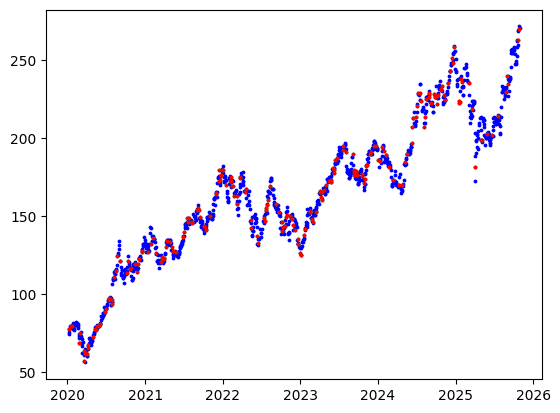

In [34]:
plt.scatter(train[0],train[4],s=3,color='blue')

plt.scatter(val[0],val[4],s=3,color='green')
plt.scatter(test[0],test[4],s=3,color='red')

In [35]:
x_train=train[[1,2,3]]

In [36]:
x_train
x_train=x_train.astype(np.float32)
x_train

,1,2,3
0,,,
2024-09-03,226.490005,229.789993,229.000000
2025-06-04,202.820007,200.630005,203.919998
2024-01-19,183.630005,182.679993,188.630005
2020-11-02,111.199997,115.320000,108.860001
2020-05-06,72.267502,73.290001,74.389999
...,...,...,...
2022-11-07,145.029999,138.880005,138.380005
2023-08-11,179.800003,178.190002,177.970001
2024-05-15,183.050003,186.279999,187.429993


In [37]:
y_train=train[4]

In [38]:
y_train=y_train.astype(np.float32)
y_train

,4
0,
2024-09-03,222.770004
2025-06-04,201.449997
2024-01-19,191.559998
2020-11-02,108.769997
2020-05-06,75.157501
...,...
2022-11-07,138.919998
2023-08-11,177.789993
2024-05-15,189.720001


In [39]:
x_test=test[[1,2,3]]

In [40]:
y_test=test[4]

In [41]:
x_val=val[[1,2,3]]
y_val=val[4]

In [42]:
x_test=np.array(x_test)
y_test=np.array(y_test)
x_train=np.array(x_train)
y_train=np.array(y_train)
x_val=np.array(x_val)
y_val=np.array(y_val)

In [43]:
x_test
x_test=x_test.astype(np.float32)

In [44]:
y_test=y_test.astype(np.float32)

In [45]:
x_val=x_val.astype(np.float32)
y_val=y_val.astype(np.float32)

# Model architecture

In [46]:
model=Sequential(
    [
        Input(shape=(3,1)),
        LSTM(units=64),
        Dense(32,activation='relu'),
        Dense(16,activation='relu'),
        Dense(1)

    ]
)

In [47]:
model.compile(loss='mse',optimizer='adam',metrics=['mean_absolute_error'])


# Training and evaluation

In [48]:
x_train=tf.convert_to_tensor(x_train)

In [49]:
model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=300,batch_size=50)

Epoch 1/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 28586.4023 - mean_absolute_error: 162.9140 - val_loss: 28335.2266 - val_mean_absolute_error: 161.8136
Epoch 2/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 29134.1230 - mean_absolute_error: 164.4017 - val_loss: 27875.1113 - val_mean_absolute_error: 160.3814
Epoch 3/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 27384.6992 - mean_absolute_error: 159.0949 - val_loss: 26974.7656 - val_mean_absolute_error: 157.5191
Epoch 4/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 26658.0371 - mean_absolute_error: 156.6768 - val_loss: 24960.7051 - val_mean_absolute_error: 150.8805
Epoch 5/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 24471.9531 - mean_absolute_error: 149.3860 - val_loss: 20320.9355 - val_mean_absolute_error: 134.5649
Epoch 6/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 19240.0449 - mean_absolute_error: 130.8626 - val_loss: 13765.2109 - val_mean_absolute_error: 107.6083
Epoch 7/300
21/21 ━━━━━━━━━━

In [50]:
pred=model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [51]:
pred

array([[156.19876 ],
       [229.71083 ],
       [232.23515 ],
       [161.30064 ],
       [154.75162 ],
       [195.43094 ],
       [179.29573 ],
       [199.98785 ],
       [181.01903 ],
       [116.543335],
       [149.09584 ],
       [184.18211 ],
       [189.36046 ],
       [165.78026 ],
       [133.99191 ],
       [135.65733 ],
       [238.9572  ],
       [116.16452 ],
       [115.06008 ],
       [223.68233 ],
       [119.14406 ],
       [196.03043 ],
       [184.26611 ],
       [142.27882 ],
       [ 78.103386],
       [132.00859 ],
       [233.09537 ],
       [149.9108  ],
       [129.32133 ],
       [153.21776 ],
       [174.7988  ],
       [254.12672 ],
       [127.00181 ],
       [146.30678 ],
       [ 93.97271 ],
       [157.63705 ],
       [ 78.96667 ],
       [114.95001 ],
       [171.21718 ],
       [123.80486 ],
       [165.91815 ],
       [ 97.794945],
       [185.64375 ],
       [196.8239  ],
       [116.9584  ],
       [169.902   ],
       [ 77.21572 ],
       [216.9

In [52]:
loss, mae = model.evaluate(x_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.6910 - mean_absolute_error: 2.3120 


In [53]:
loss

10.067837715148926

In [54]:
mae

2.3943567276000977

In [55]:
y_test[0]
y_test[4]

np.float32(153.2)

In [56]:
y_test[1]

np.float32(226.47)

In [57]:
y_test[2]

np.float32(228.2)

In [58]:
y_test[3]

np.float32(162.74)

In [59]:
pred=pd.DataFrame(pred)

In [60]:
pred

,0
0,156.198761
1,229.710831
2,232.235153
3,161.300644
4,154.751617
...,...
215,87.621185
216,172.830368
217,172.743301
218,154.478806


In [61]:
pred['actual']=y_test

In [62]:
pred

,0,actual
0,156.198761,154.070007
1,229.710831,226.470001
2,232.235153,228.199997
3,161.300644,162.740005
4,154.751617,153.199997
...,...,...
215,87.621185,90.445000
216,172.830368,172.990005
217,172.743301,174.830002
218,154.478806,150.649994


In [63]:
pred['absolute_error']=pred['actual']-pred[0]

In [64]:
pred.style

,0,actual,absolute_error
0,156.198761,154.070007,-2.128754
1,229.710831,226.470001,-3.240829
2,232.235153,228.199997,-4.035156
3,161.300644,162.740005,1.439362
4,154.751617,153.199997,-1.551620
5,195.430939,191.940002,-3.490936
6,179.295731,179.360001,0.064270
7,199.987854,198.529999,-1.457855
8,181.019028,179.210007,-1.809021
9,116.543335,119.050003,2.506668


In [65]:
y_test.mean()

np.float32(162.5781)

In [66]:
train

,0,1,2,3,4
0,,,,,
2024-09-03,2024-09-03,226.490005,229.789993,229.0,222.770004
2025-06-04,2025-06-04,202.820007,200.630005,203.919998,201.449997
2024-01-19,2024-01-19,183.630005,182.679993,188.630005,191.559998
2020-11-02,2020-11-02,111.199997,115.32,108.860001,108.769997
2020-05-06,2020-05-06,72.267502,73.290001,74.389999,75.157501
...,...,...,...,...,...
2022-11-07,2022-11-07,145.029999,138.880005,138.380005,138.919998
2023-08-11,2023-08-11,179.800003,178.190002,177.970001,177.789993
2024-05-15,2024-05-15,183.050003,186.279999,187.429993,189.720001


# Explainable AI (LIME & SHAP)

In [67]:
!pip install lime
import lime
from lime import lime_tabular
train['0'] = pd.to_numeric(train['0'])
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(train),
    feature_names=train.columns,
    class_names=['predicted_value'],
    discretize_continuous=True
)

# Generate explanations for a few predicted values
for i in range(5):
    explanation = explainer.explain_instance(
        data_row=x_test[i],
        predict_fn=model.predict
    )

    # Print the explanation
    print(f"Explanation for predicted value {i + 1}:")
    print(explanation.as_list())



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=4133fb780e25b9c59e4cb7db90b928758a2d27ee6a87bfb8c445c90927e0e1e2
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


KeyError: '0'

In [68]:
!pip install shap


In [69]:
import lime
import lime.lime_tabular
import shap


In [70]:
# LIME Explainability
# Convert x_train to a NumPy array and get column names if available
x_train_np = x_train.numpy()
feature_names = x_train.columns if hasattr(x_train, 'columns') else [f'feature_{i}' for i in range(x_train_np.shape[1])]

explainer = lime.lime_tabular.LimeTabularExplainer(
    x_train_np,
    feature_names=feature_names,
    class_names=['target'],
    verbose=True,
    mode='regression'
)

# Explain a single prediction
i = 0  # Index of the test sample to explain
exp = explainer.explain_instance(x_test[i], model.predict, num_features=5)
exp.show_in_notebook(show_table=True)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Intercept 177.69507604700362
Prediction_local [153.59372314]
Right: 156.19876


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


  0%|          | 0/220 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
192/192 ━━

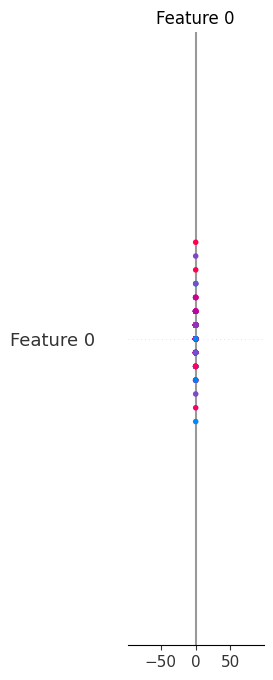

In [71]:
import shap
import numpy as np # Import numpy for array conversion

# Create a Shapley explainer
# Convert x_train to a NumPy array
explainer = shap.KernelExplainer(model.predict, np.array(x_train))

# Calculate Shapley values for the test data
shap_values = explainer.shap_values(x_test)

# Print the Shapley values for the first prediction
print("Shapley values for the first prediction:")
print(shap_values[0])

# Plot the Shapley values for all predictions
shap.summary_plot(shap_values, x_test)